## Dataset Loading

The variables of data are called its *features*
*Feature matrix* − It is the collection of features, in case there are more than one.
*Feature Names*-  It is the list of all the names of the features

*Response* − It is the output variable that basically depends upon the feature variables.
*Target Names* − It represent the possible values taken by a response vector.

[tutorial source](https://www.tutorialspoint.com/scikit_learn/scikit_learn_modelling_process.htm)

In [1]:
from sklearn.datasets import load_iris

> Scikit-learn have few example datasets like iris and digits for classification and the Boston house prices for regression.

In [2]:
iris_flower = load_iris()
x = iris_flower.data # features: sepal length and width, petal length and width, 150 data, 150 x 4 matrix
y = iris_flower.target # class: setosa, versicolor, virginica
feature_names = iris_flower.feature_names
target_names = iris_flower.target_names
print("Features Names: ", feature_names)
print("Target Names: ", target_names)
print("x first 10 rows\n", x[:10])
print("y first 10 rows\n", y[:10])

Features Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names:  ['setosa' 'versicolor' 'virginica']
x first 10 rows
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y first 10 rows
 [0 0 0 0 0 0 0 0 0 0]


### Splitting the dataset
To check the accuracy of our model, we can split the dataset into two pieces-a **training set** and a **testing set.**

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# x is a feature matrix
# y is a response vector
# test_size - ratio of the test data to the total given data
# 150 rows * 0.3 = 45 rows in this case
# random_state=1 - It is used to guarantee that the split will always be the same. This is useful in the situations where you want reproducible results, useful when debugging.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#NOTE Training data to learn patterns, Testing data to check accuracy

(105, 4)
(45, 4)
(105,)
(45,)


### Training the Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier is a machine learning model from scikit-learn. It helps you classify new data based on similarity with already labeled data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
model = KNeighborsClassifier(n_neighbors=3)  # looks at 3 neighbors
model.fit(x_train, y_train)  # train from training data, model fitting

# now model predicting
# model.predict([[5.1, 3.5, 1.4, 0.2]]) # new flower data
# o/p: array([0]) = class Setosa
model.predict([[2.7, 2.3, 3.3, 2.8]]) # versicolor

array([1])

##### Where do we use testing data then?

x_test to predict, y_test to check if it's right

In [7]:
from sklearn.metrics import accuracy_score

In [30]:
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print("Model's Accuracy:", accuracy)  # Model's Accuracy: 0.9777777777777777

Model's Accuracy: 0.9777777777777777


In [9]:
# Day 4
import joblib
joblib.dump(model, "iris_model.joblib") # can also use extension .pkl

['iris_model.joblib']

### Day 9

In [10]:
import pandas as pd

In [11]:
iris_df = pd.DataFrame(data=x, columns=feature_names)
# print(iris_df.describe())
# print("target: ",y)
print("first 5 rows of features: ", x[:5])
print("first 5 rows of target:",y[:5])
iris_df.head()

first 5 rows of features:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
first 5 rows of target: [0 0 0 0 0]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visualizing the Data

In [12]:
import matplotlib.pyplot as plt

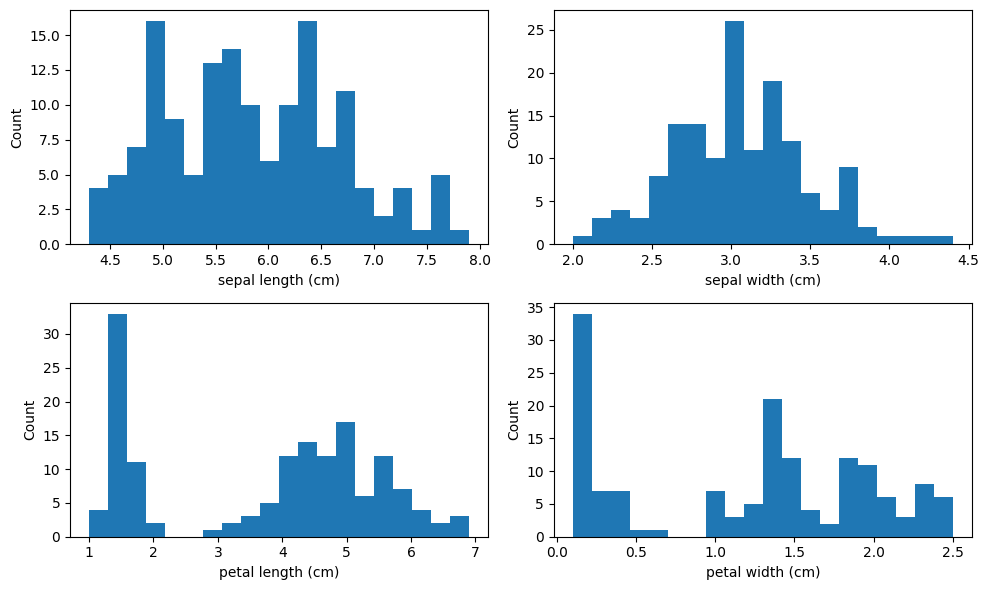

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
for i, ax in enumerate(axes.flat):  # enumerate adds a counter to an iterable
    # axes.flat => flattens the 2*2 matrix in 1D to iterate through each
    ax.hist(x[:, i], bins=20)
    # all rows, ith colm, interval(bins) = 20
    ax.set(xlabel=feature_names[i], ylabel="Count")


fig.tight_layout()  # makes sure the graph is not overlapping
plt.show()

In [14]:
import numpy as np
counts, bin_edges = np.histogram(x[:,i],bins=20)
print(max(counts)) # highest value in last iteration (plot) actually
# doesn't plot, just to analyze


34


### Scatter Plots to visualize the relation between pairs of featres

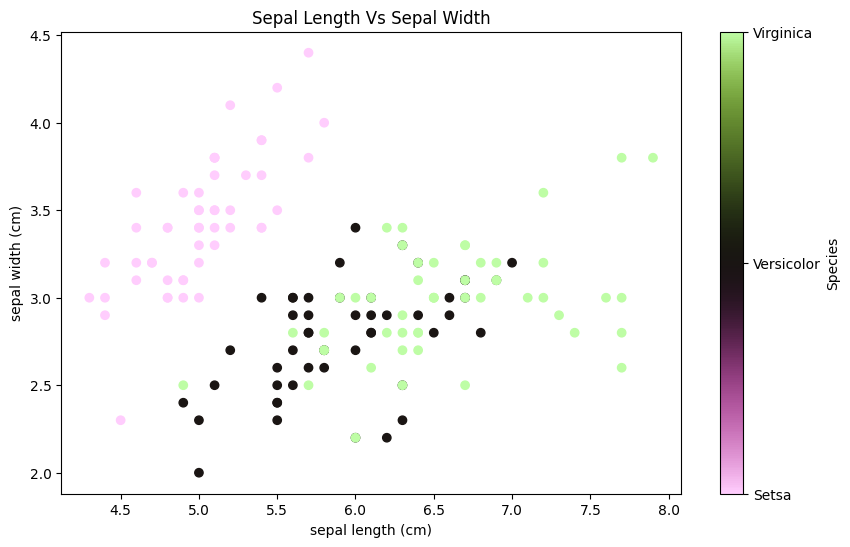

In [15]:
plt.figure(figsize=(10, 6))  # in inches
plt.scatter(
    x[:, 0], x[:, 1], label="length vs width", c=y, cmap="vanimo"
)  # sepal length vs sepal width
# INFO c=y => assign colors to points based on target variable y (species label 0,1,2) and cmap = colormap to viridis => smooth gradient from purple to yellow
plt.title("Sepal Length Vs Sepal Width")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
# plt.legend()
cbar = plt.colorbar(ticks=[0, 1, 2], label="Species")  # color scale legend to our plot

# setting the ticks labels to the species names
cbar.set_ticklabels(["Setsa", "Versicolor", "Virginica"])

plt.show()

In [33]:
from matplotlib import colormaps
# list(colormaps)

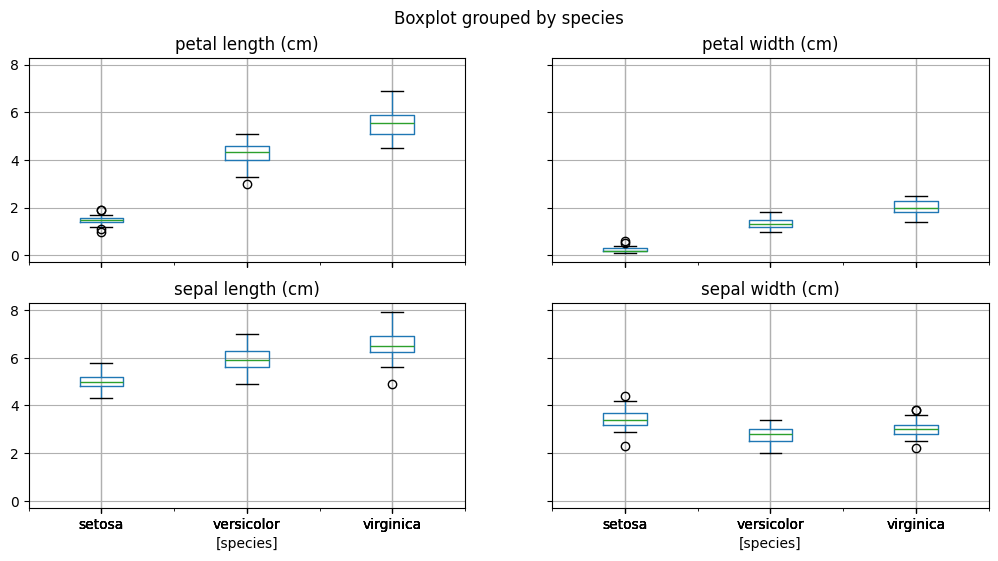

In [17]:
# print("iris dataframe",iris_df)
iris_df["species"] = pd.Categorical.from_codes(iris_flower.target, iris_flower.target_names)
# iris_flower.target => numeric species labels
# from_codes(target, target_names) takes the numerical codes (the species labels like 0, 1, 2) and maps them to the corresponding species names (like "Setosa", "Versicolor", "Virginica")
iris_df.boxplot(by="species",figsize=(12,6))

plt.show()

### Analyzing features
Analyzing the features of the Iris dataset can help you understand which features are most important for distinguishing between the different species.  
* Feature Importance: Feature importance refers to the degree to which each feature contributes to the prediction accuracy of a model
* Feature Correlation: Feature correlation refers to the degree to which two features are related to each other. Highly correlated features may provide redundant information, which can sometimes negatively impact model performance

In [18]:
corr_mat = iris_df[feature_names].corr()
corr_mat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

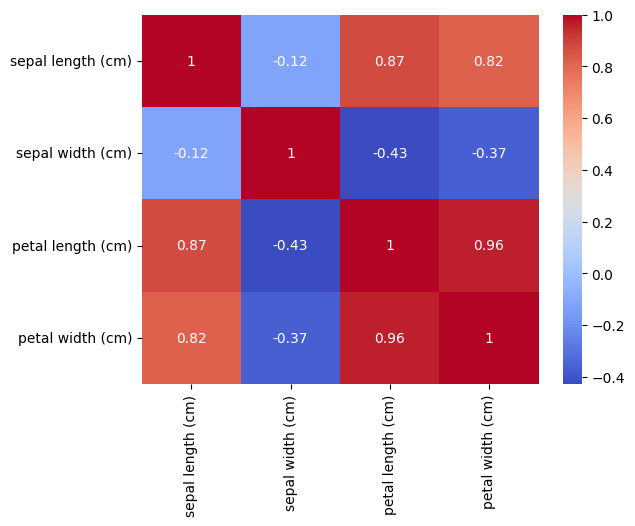

In [19]:
import seaborn as sns

sns.heatmap(corr_mat,annot=True,cmap='coolwarm')